<a href="https://colab.research.google.com/github/tejaspradhan/Sentiment-Analysis/blob/main/code/Sentiment_Analysis_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying a 1-D Convolutional Neural Network on Twitter Data

## Importing the Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import sequence,text
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Embedding, MaxPool1D,Dropout

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import pickle

## Reading the Data and Splitting into X, Y

In [2]:
data = pd.read_csv('/content/train_preprocessed.csv')

In [3]:
data.head()

,Unnamed: 0,label,cleaned_tweet
0,0,0,user when a father is dysfunctional and is so...
1,1,0,user user thanks for lyft credit i cant use c...
2,2,0,bihday your majesty
3,3,0,model i love u take with u all the time in ur
4,4,0,factsguide society now motivation


In [4]:
x,y = data['cleaned_tweet'],data['label']
x.shape,y.shape

((31962,), (31962,))

## Converting words to Vectors using Tokenizer 

In [5]:
tokenizer = text.Tokenizer(num_words=50)
tokenizer.fit_on_texts(x)
x_mat = tokenizer.texts_to_matrix(x)
x_vec = sequence.pad_sequences(x_mat,maxlen=50)

## Using SMOTE to oversample the minority Class

As the dataset is imbalanced

In [6]:
resampler = SMOTE()
x_vec,y = resampler.fit_resample(x_vec,y)

Splitting into Training and Test Sets

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x_vec,y,test_size=0.3)

In [8]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((41608, 50), (17832, 50), (41608,), (17832,))

## Building the CNN Model

In [9]:
model = Sequential()
model.add(Embedding(50,10,input_length=50))
model.add(Conv1D(64, kernel_size=3))
model.add(MaxPool1D())
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=3))
model.add(MaxPool1D())
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 10)            500       
                                                                 
 conv1d (Conv1D)             (None, 48, 64)            1984      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 11, 64)           0         
 1D)                                                    

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Fitting the Model on Training Data

In [12]:
history = model.fit(x_train,y_train,epochs = 50, validation_data=(x_test,y_test))

Epoch 1/50
1301/1301 [==============================] - 14s 10ms/step - loss: 0.4795 - accuracy: 0.7641 - val_loss: 0.4465 - val_accuracy: 0.7816
Epoch 2/50
1301/1301 [==============================] - 13s 10ms/step - loss: 0.4297 - accuracy: 0.7948 - val_loss: 0.4243 - val_accuracy: 0.7939
Epoch 3/50
1301/1301 [==============================] - 13s 10ms/step - loss: 0.4100 - accuracy: 0.8061 - val_loss: 0.4165 - val_accuracy: 0.8023
Epoch 4/50
1301/1301 [==============================] - 15s 11ms/step - loss: 0.3933 - accuracy: 0.8149 - val_loss: 0.4022 - val_accuracy: 0.8132
Epoch 5/50
1301/1301 [==============================] - 14s 11ms/step - loss: 0.3826 - accuracy: 0.8210 - val_loss: 0.3955 - val_accuracy: 0.8187
Epoch 6/50
1301/1301 [==============================] - 14s 11ms/step - loss: 0.3736 - accuracy: 0.8265 - val_loss: 0.3938 - val_accuracy: 0.8184
Epoch 7/50
1301/1301 [==============================] - 14s 11ms/step - loss: 0.3652 - accuracy: 0.8305 - val_loss: 0.3813 -

## Plotting the Accuracy and Loss Curves

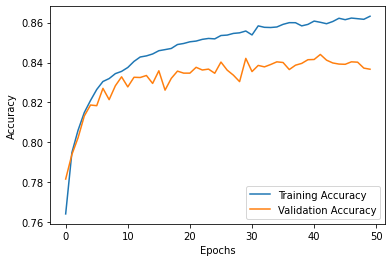

In [13]:
plt.plot(np.arange(0,50),history.history['accuracy'])
plt.plot(np.arange(0,50),history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.show()

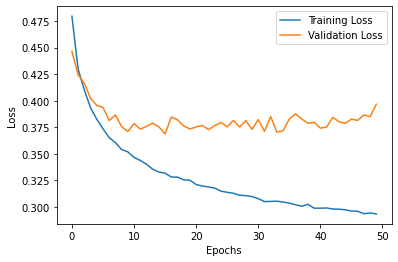

In [16]:
plt.plot(np.arange(0,50),history.history['loss'])
plt.plot(np.arange(0,50),history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.show()

## Saving the Models

In [14]:
model.save('cnn.h5')

In [15]:
pickle.dump(tokenizer,open('tokenizer','wb'))

## The End